In [1]:
# importing modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# change to file directory
os.chdir('C:/Users/User/Documents/Fractal_AI')

In [3]:
train = pd.read_csv('credit_card_default_TRAIN.csv')
test = pd.read_csv('credit_card_default_TEST.csv')

In [4]:
# check for null values
train.isnull().sum()

Variable    0
X1          0
X2          0
X3          0
X4          0
X5          0
X6          0
X7          0
X8          0
X9          0
X10         0
X11         0
X12         0
X13         0
X14         0
X15         0
X16         0
X17         0
X18         0
X19         0
X20         0
X21         0
X22         0
X23         0
Y           0
dtype: int64

In [10]:
test.isnull().sum()

Variable    0
X1          0
X2          0
X3          0
X4          0
X5          0
X6          0
X7          0
X8          0
X9          0
X10         0
X11         0
X12         0
X13         0
X14         0
X15         0
X16         0
X17         0
X18         0
X19         0
X20         0
X21         0
X22         0
X23         0
dtype: int64

In [5]:
train.head()

,Variable,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [6]:
columns = train.iloc[0,1:-1].values

In [7]:
columns

array(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6'], dtype=object)

In [8]:
train['Y'].value_counts()

0                             17412
1                              5088
default payment next month        1
Name: Y, dtype: int64

In [9]:
train = train.drop(train.index[0])
train.head()

,Variable,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
i = list(train)
for l in i :
    train.loc[:,l] = pd.to_numeric(train.loc[:,l])

In [11]:
x = train.iloc[:, :-1]
del x['Variable']

In [12]:
x.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [13]:
train['Y'] = pd.to_numeric(train['Y'])
y = train['Y']

In [14]:
# ranking features wrt. correlation with Target variable
from sklearn.feature_selection import mutual_info_classif


In [15]:
dis_feat = [1,2,3,4,5,6,7,8,9,10]
cor = mutual_info_classif(x,y, discrete_features = dis_feat,  n_neighbors = 10)

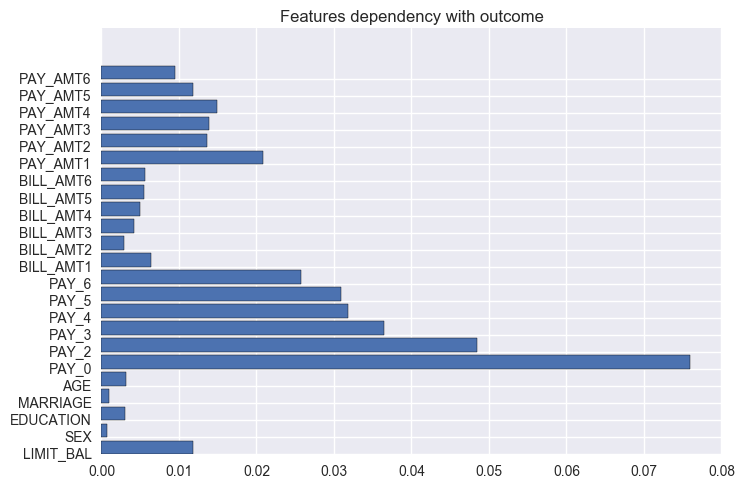

In [16]:

y_pos = np.arange(len(columns))

plt.barh(y_pos, cor)
plt.yticks(y_pos, columns)
plt.title('Features dependency with outcome')
plt.show()

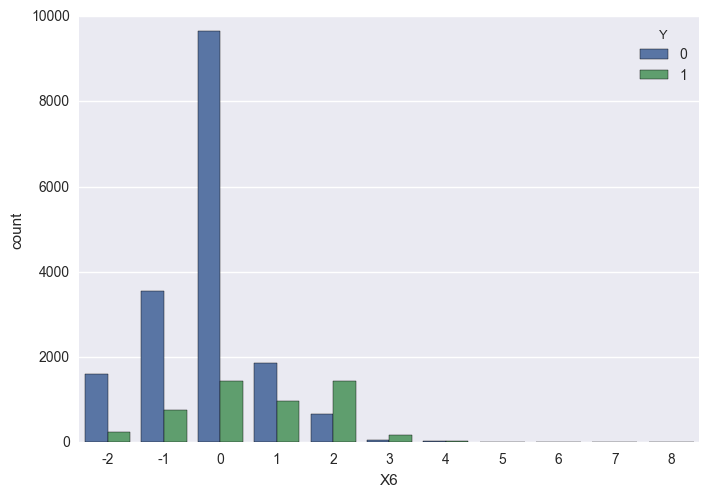

In [17]:
# Here we Observe that PAY_0 has higher dependency with Outcome 
# So lets try to Understand what's happening there

sns.countplot(x="X6", hue="Y", data=train)
plt.show()




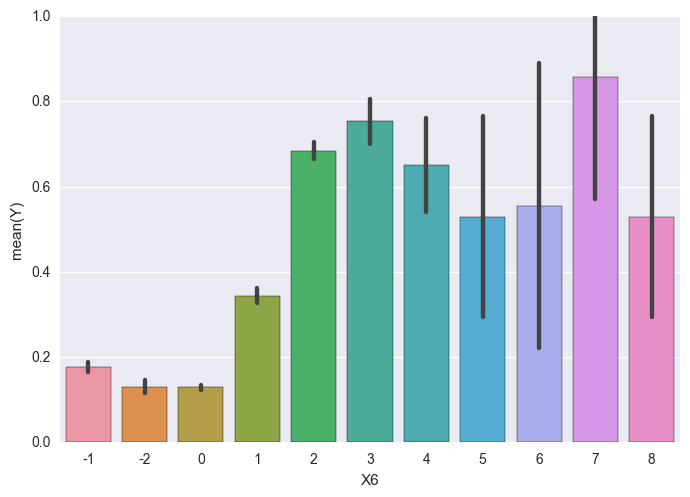

In [155]:
# To understand it in a better perspective


sns.barplot(x="X6", y="Y", data=train)
plt.show()

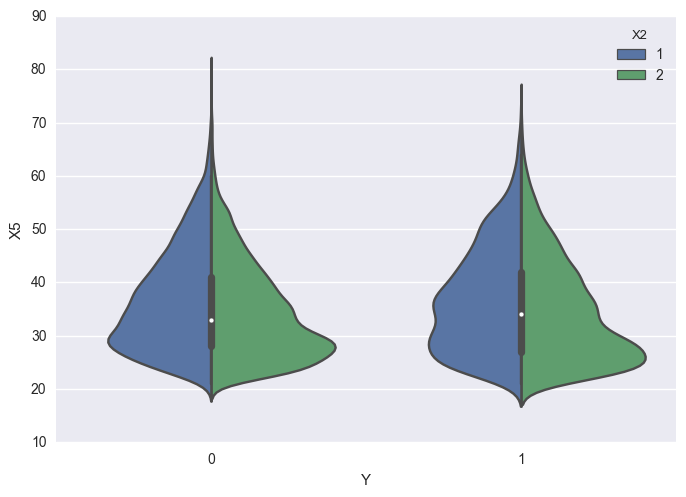

In [165]:
# checking relationships
# Age vs Default payment next month splitted wrt Sex


sns.violinplot(x="Y", y="X5", hue="X2", data=train, split=True)
plt.show()



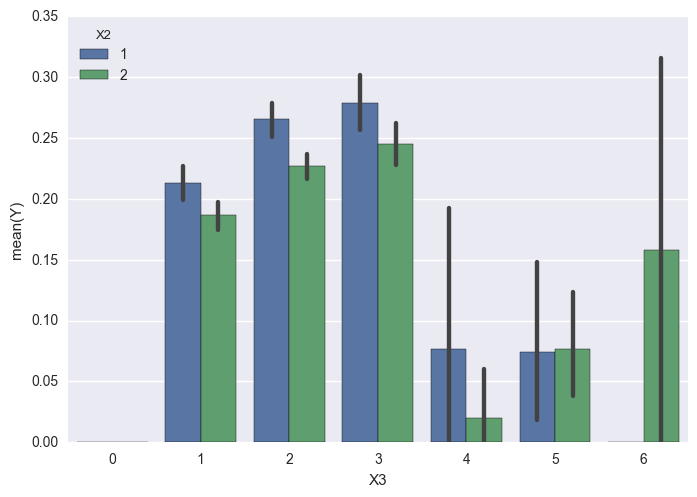

In [166]:
# Education vs. payment next month splitter wrt sex

sns.barplot(x="X3", y="Y", hue="X2", data=train)
plt.show()




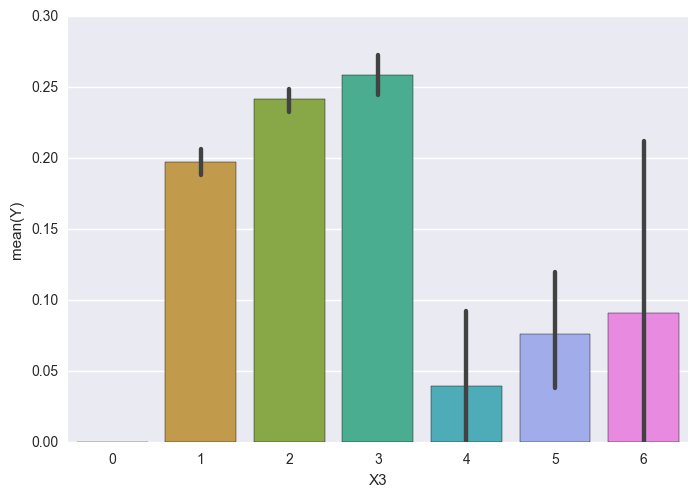

In [167]:
sns.barplot(x="X3", y="Y",  data=train)
plt.show()

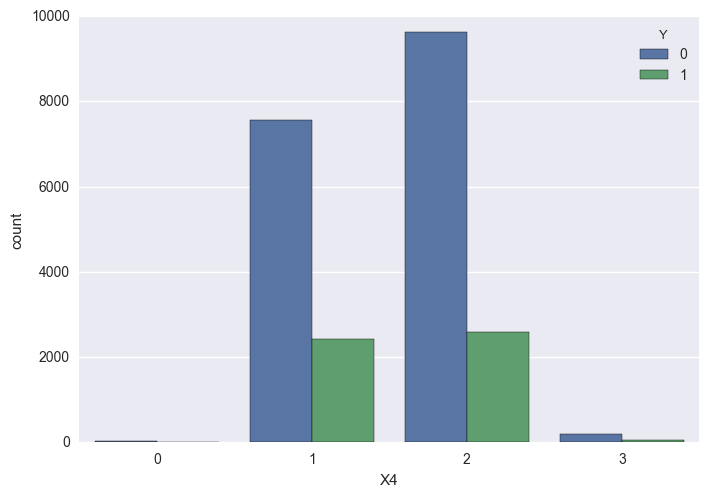

In [168]:
sns.countplot(x="X4", hue="Y", data=train)
plt.show()

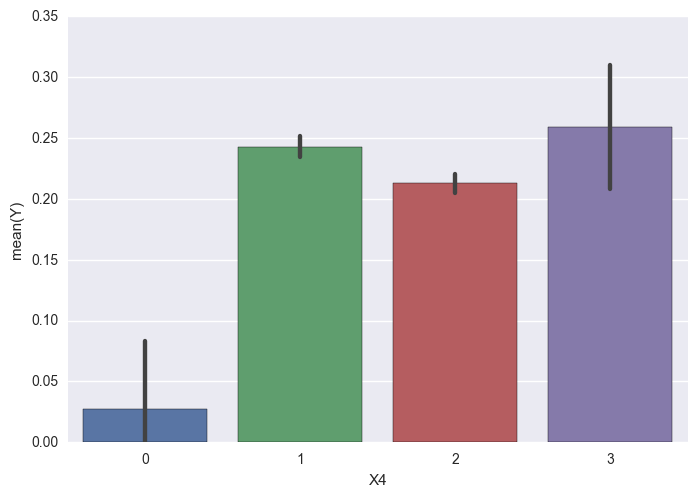

In [169]:
# Marital Status vs. Default Ratio
sns.barplot(x="X4", y="Y",  data=train)
plt.show()

In [41]:
train['X3'].value_counts()

2    10634
1     7982
3     3581
5      184
4       76
6       33
0       10
Name: X3, dtype: int64

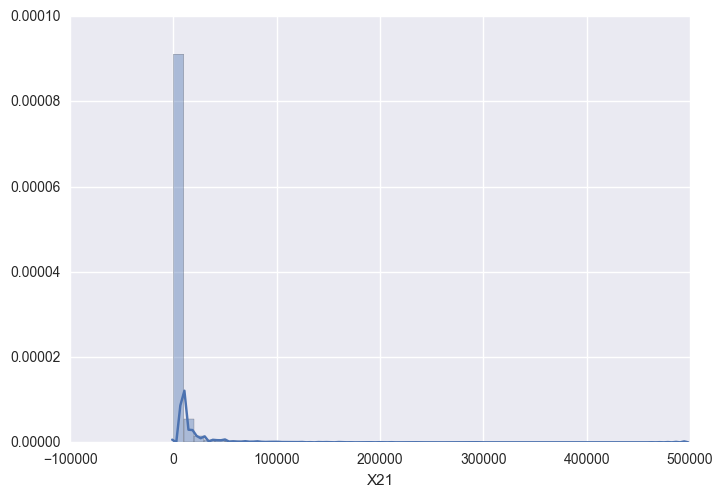

In [182]:
sns.distplot(x['X21'])
plt.show()

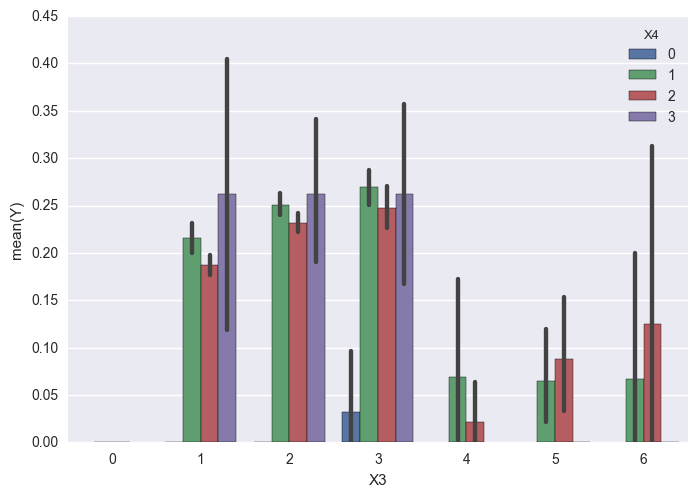

In [67]:
# Education vs. payment next month splitter wrt marital status

sns.barplot(x="X3", y="Y", hue="X4", data=train)
plt.show()

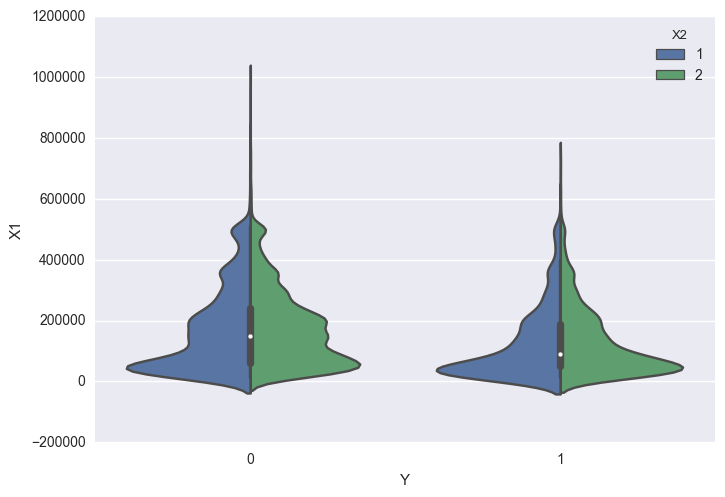

In [170]:
# Amount of given credit vs payment next month splitted with Sex
train['X1'] = pd.to_numeric(train['X1'])
sns.violinplot(x="Y", y="X1", hue="X2", data=train, split=True)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [57]:
x.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [19]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier( learning_rate = 0.5, n_estimators = 1000, max_depth = 2, verbose = 1, max_features = 0.9)

In [21]:
clf.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.9463            3.13m
         2           0.9163            1.70m
         3           0.9020            1.21m
         4           0.8938           58.51s
         5           0.8884           49.95s
         6           0.8852           44.07s
         7           0.8824           40.00s
         8           0.8805           36.83s
         9           0.8778           34.46s
        10           0.8757           32.57s
        20           0.8613           22.98s
        30           0.8541           19.21s
        40           0.8468           17.26s
        50           0.8394           16.04s
        60           0.8321           15.43s
        70           0.8259           14.75s
        80           0.8193           14.56s
        90           0.8127           14.38s
       100           0.8074           14.35s
       200           0.7555           11.69s
       300           0.7139            9.81s
       40

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=2,
              max_features=0.9, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=1.0, verbose=1,
              warm_start=False)

In [22]:
clf.score(X_test, y_test)

0.7973063973063973

In [23]:
train['Y'].value_counts()

0    17412
1     5088
Name: Y, dtype: int64

In [24]:
sum(clf.predict(X_test)[ (y_test == 1).values ])

648

In [25]:
sum(y_test == 1)

1645

In [26]:
621.0 / 1645

0.37750759878419454

In [27]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, clf.predict(X_test)).ravel()

In [28]:
# sensitivity recall hit rate
tpr = float(tp) / ( tp + fn )
tpr

0.39392097264437692

In [29]:
tn / float( tn + fp )

0.9121107266435986

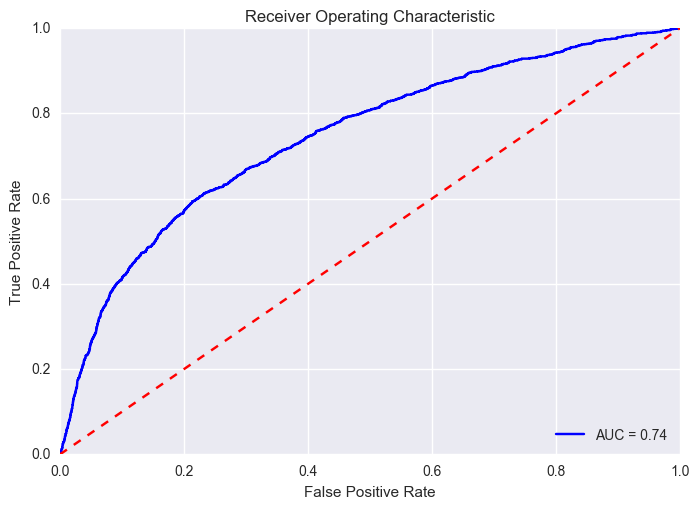

In [30]:
from sklearn import metrics
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


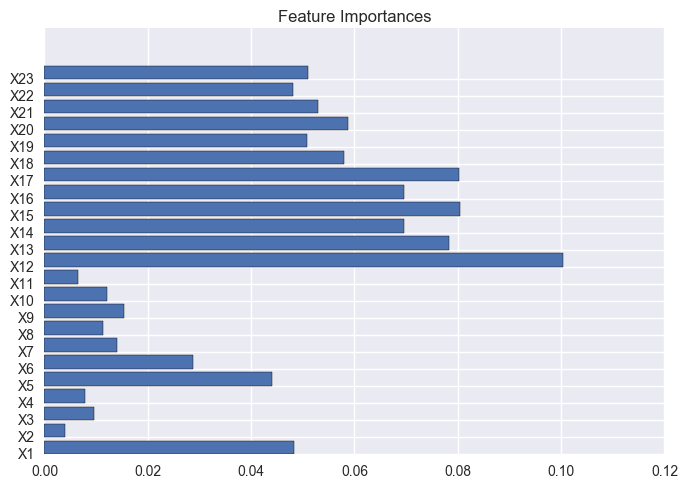

In [31]:
# feature importances
height = list(clf.feature_importances_)
bars = list(x.columns)
y_pos = np.arange(len(bars))
plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title('Feature Importances')
plt.show()


In [74]:
# loading main test file

main_test = pd.read_csv('credit_card_default_TEST.csv')

In [75]:
main_test.head()

,Variable,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1,22501,180000,2,2,1,33,-1,-1,-1,-1,...,1112,10383,1980,2672,0,1112,10383,1980,2672,2197
2,22502,230000,2,1,2,33,0,0,0,0,...,41354,42368,43161,45056,2000,2000,2000,1800,2600,2000
3,22503,50000,2,2,2,44,0,0,2,3,...,20857,20229,19623,19878,3155,2500,0,0,707,713
4,22504,260000,2,2,2,32,0,0,0,0,...,234260,227884,202178,198467,10000,9014,11002,7503,7502,7500


In [76]:
main_test = main_test.drop(main_test.index[0])

In [65]:
main_test.head()

,Variable,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,22501,180000,2,2,1,33,-1,-1,-1,-1,...,1112,10383,1980,2672,0,1112,10383,1980,2672,2197
2,22502,230000,2,1,2,33,0,0,0,0,...,41354,42368,43161,45056,2000,2000,2000,1800,2600,2000
3,22503,50000,2,2,2,44,0,0,2,3,...,20857,20229,19623,19878,3155,2500,0,0,707,713
4,22504,260000,2,2,2,32,0,0,0,0,...,234260,227884,202178,198467,10000,9014,11002,7503,7502,7500
5,22505,260000,2,2,2,33,-1,-1,-1,-1,...,28656,7497,7685,15434,13000,29022,7500,27769,12000,6200


In [78]:
xx_test = main_test.copy()

In [79]:
del xx_test['Variable']

In [67]:
# training model on complete data before finalprediction

clf = GradientBoostingClassifier( learning_rate = 0.5, n_estimators = 1000, max_depth = 2, verbose = 1, max_features = 0.9)
clf.fit(x,y)


      Iter       Train Loss   Remaining Time 
         1           0.9400           30.97s
         2           0.9113           22.95s
         3           0.8973           20.60s
         4           0.8897           23.16s
         5           0.8843           21.69s
         6           0.8809           20.71s
         7           0.8782           22.13s
         8           0.8765           21.20s
         9           0.8742           20.59s
        10           0.8722           21.58s
        20           0.8616           20.63s
        30           0.8547           20.21s
        40           0.8492           19.87s
        50           0.8438           19.59s
        60           0.8392           20.30s
        70           0.8345           20.75s
        80           0.8306           20.30s
        90           0.8273           19.90s
       100           0.8233           19.54s
       200           0.7895           16.62s
       300           0.7584           14.33s
       40

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=2,
              max_features=0.9, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=1.0, verbose=1,
              warm_start=False)

In [80]:
# output dataframe

out = pd.DataFrame()

In [81]:
i = list(xx_test)
for l in i :
    xx_test.loc[:,l] = pd.to_numeric(xx_test.loc[:,l])

In [82]:
out['ID'] = main_test['Variable']

In [84]:
out['Y'] = clf.predict(xx_test)

In [85]:
out.head()

,ID,Y
1,22501,0
2,22502,0
3,22503,0
4,22504,0
5,22505,0


In [87]:
out.to_csv('submission_file.csv', index = False)